In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np 

# Check PyTorch version
torch.__version__

'2.0.1'

In [4]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

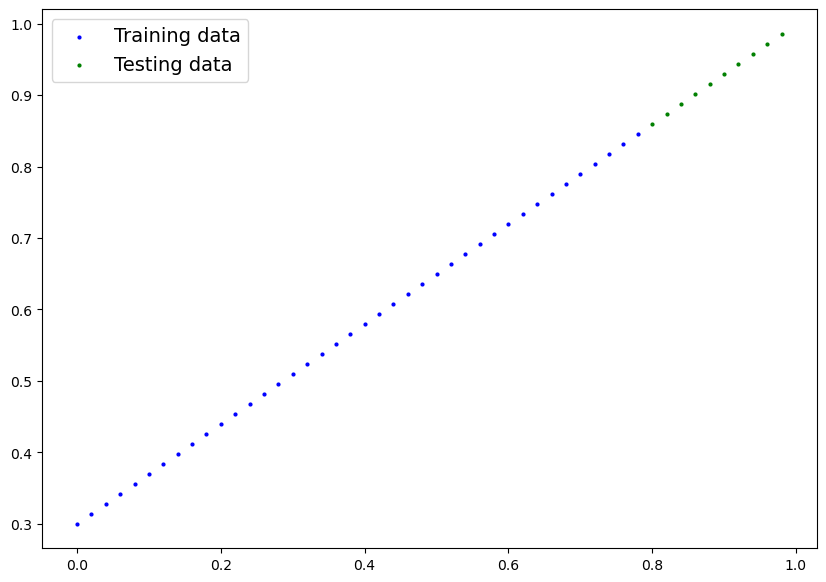

In [7]:
plot_predictions();

In [41]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, 
                            dtype=torch.float), 
                            requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1, 
                    dtype=torch.float), 
                    requires_grad=True) 

        self.test = torch.tensor([0.0],requires_grad=False)

    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 

In [103]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

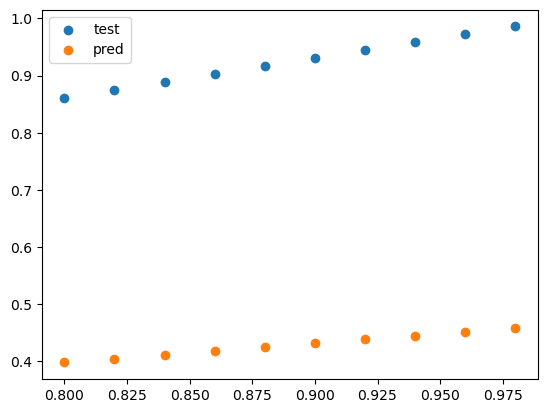

In [46]:
plt.scatter(X_test,y_test,label= "test")
plt.scatter(X_test,y_preds,label ="pred")
plt.legend()
plt.show()

In [104]:
loss_fn = nn.L1Loss() 
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01) 

In [105]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()  # Put model in training mode 
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward() # gradients accumalte in parameters of model_0
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
      test_pred = model_0(X_test) #this is an error in the course should be validation set
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) 
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.47563618421554565 
Epoch: 10 | MAE Train Loss: 0.17388132214546204 | MAE Test Loss: 0.2866361737251282 
Epoch: 20 | MAE Train Loss: 0.042198795825242996 | MAE Test Loss: 0.0987466350197792 
Epoch: 30 | MAE Train Loss: 0.044207725673913956 | MAE Test Loss: 0.005456471350044012 
Epoch: 40 | MAE Train Loss: 0.02264046110212803 | MAE Test Loss: 0.0635034516453743 
Epoch: 50 | MAE Train Loss: 0.017085567116737366 | MAE Test Loss: 0.04095941036939621 
Epoch: 60 | MAE Train Loss: 0.008707210421562195 | MAE Test Loss: 0.013333231210708618 
Epoch: 70 | MAE Train Loss: 0.0023071542382240295 | MAE Test Loss: 0.0023452341556549072 
Epoch: 80 | MAE Train Loss: 0.0022460855543613434 | MAE Test Loss: 0.0020259260199964046 
Epoch: 90 | MAE Train Loss: 0.0018263093661516905 | MAE Test Loss: 0.003756243037059903 


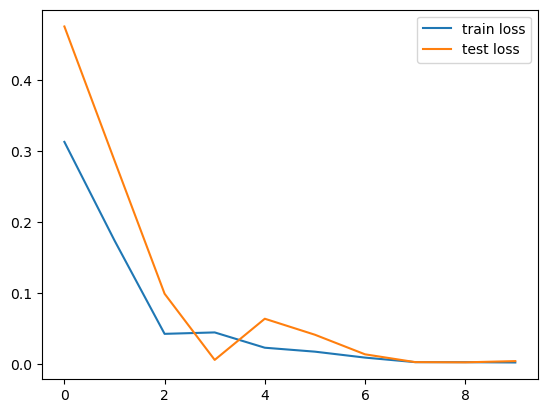

In [106]:
n = len(train_loss_values)
plt.plot(range(n),train_loss_values, label="train loss")
plt.plot(range(n),test_loss_values,label="test loss")
plt.legend()
plt.show()

In [107]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7037])), ('bias', tensor([0.3006]))])

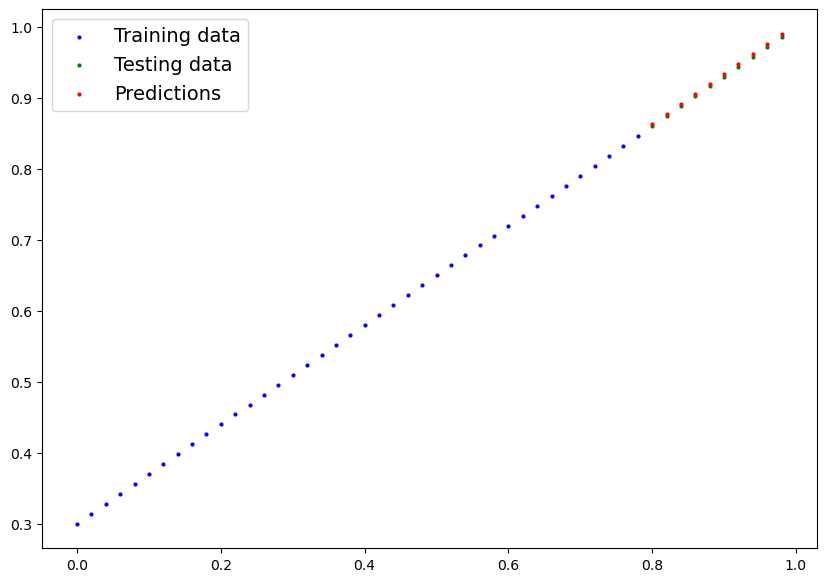

In [108]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [109]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_0.pth


Saving the entire model rather than just the state_dict() is more intuitive, however, to quote the PyTorch documentation (italics mine):

    The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...

    Because of this, your code can break in various ways when used in other projects or after refactors.

In [111]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [112]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

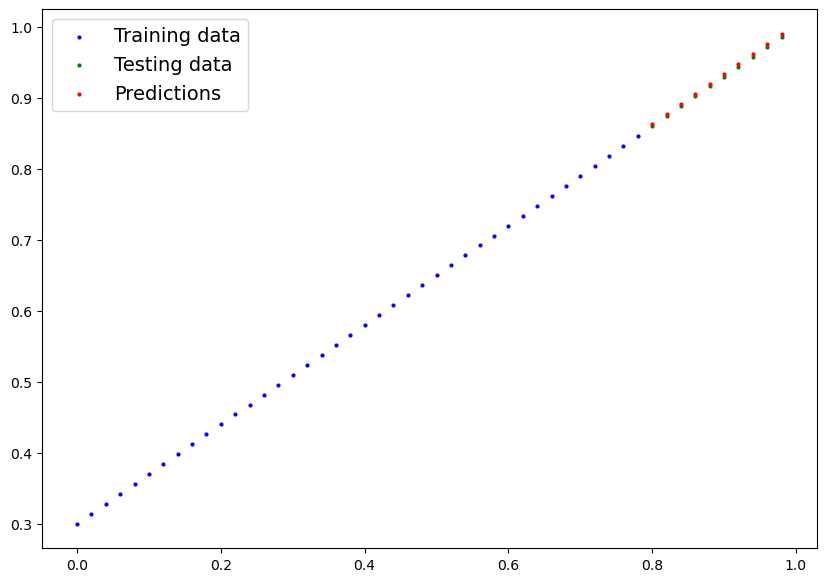

In [113]:

plot_predictions(predictions=loaded_model_preds)